# 계층적 군집분석

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/쿠팡물류센터/쿠팡물류센터.csv')
df

,물류센터이름,위도,경도
0,쿠팡 용인2캠프,37.224143,127.098984
1,쿠팡물류센터 동탄점,37.171236,127.125612
2,쿠팡 동탄1센터,37.171107,127.125676
3,쿠팡오산센터,37.140799,127.067172
4,"쿠팡 용인2,3센터",37.176290,127.179059
...,...,...,...
78,쿠팡 제주1캠프,33.463293,126.527863
79,쿠팡 대구2캠프,35.929339,128.655630
80,쿠팡 울산2캠프,35.509751,129.301472
81,쿠팡 대전2미니캠프,36.423367,127.421486


In [ ]:
# 쿠팡 물류센터의 위도, 경도만 추출
df_coord = df.drop(labels='물류센터이름', axis=1)
df_coord

,위도,경도
0,37.224143,127.098984
1,37.171236,127.125612
2,37.171107,127.125676
3,37.140799,127.067172
4,37.176290,127.179059
...,...,...
78,33.463293,126.527863
79,35.929339,128.655630
80,35.509751,129.301472
81,36.423367,127.421486


In [ ]:
# 계산을 위한 numpy 변환
coord_np = df_coord.to_numpy()
coord_np

array([[ 37.22414286, 127.0989842 ],
       [ 37.17123556, 127.1256121 ],
       [ 37.17110733, 127.1256765 ],
       [ 37.14079948, 127.0671718 ],
       [ 37.17628971, 127.1790589 ],
       [ 37.0480699 , 127.1636801 ],
       [ 37.06806477, 127.3996074 ],
       [ 37.3798897 , 126.8031037 ],
       [ 37.4746115 , 127.1260255 ],
       [ 37.53021226, 126.7752051 ],
       [ 37.31553747, 127.3397809 ],
       [ 36.95232505, 127.1939087 ],
       [ 37.23260022, 127.2806911 ],
       [ 37.35226039, 127.3609422 ],
       [ 37.29361003, 126.9611034 ],
       [ 37.2974241 , 126.7565865 ],
       [ 36.92132563, 127.1852326 ],
       [ 37.20365477, 127.3597089 ],
       [ 37.2522688 , 127.2858037 ],
       [ 37.28119009, 127.3883043 ],
       [ 37.4511072 , 126.6145418 ],
       [ 37.53017798, 126.7751924 ],
       [ 36.94991118, 126.8549959 ],
       [ 37.23384312, 127.3605551 ],
       [ 37.36405594, 127.3345476 ],
       [ 36.9545768 , 126.8573423 ],
       [ 37.43826179, 126.6159559 ],
 

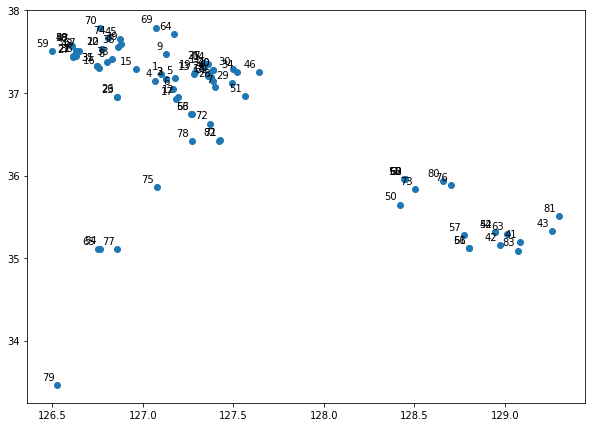

In [ ]:
# 물류센터에 번호를 부여한 후 시각화
labels = range(1, 84)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(coord_np[:,1],coord_np[:,0], label='True Position')

for label, x, y in zip(labels, coord_np[:, 1], coord_np[:, 0]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
# centroid로 계산 방법 선택
linked = linkage(coord_np, method='centroid')

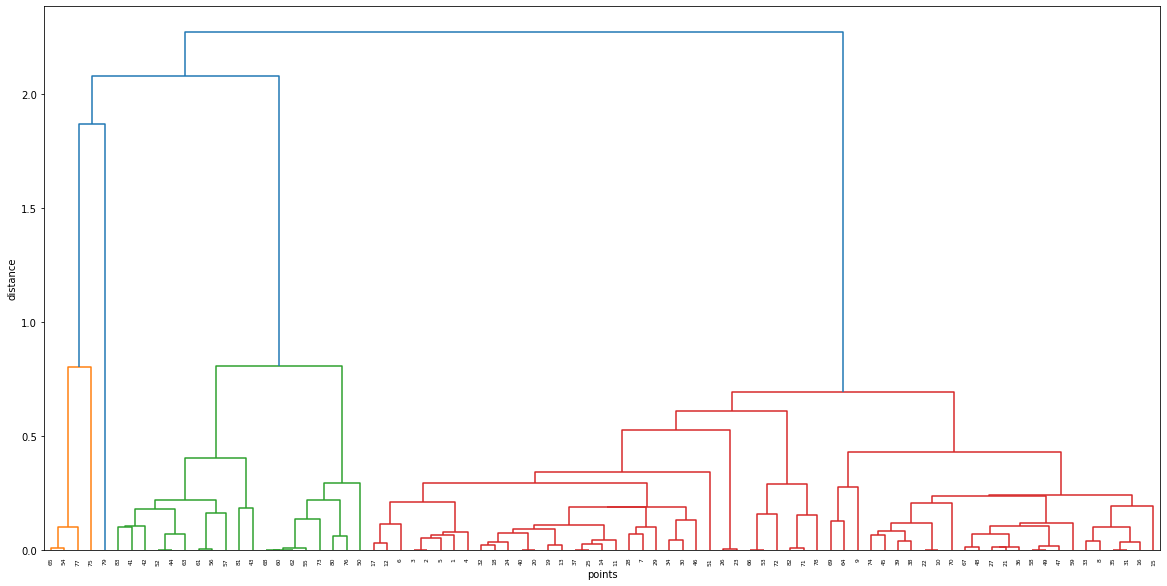

In [ ]:
# 계층적 군집분석 시각화
labelList = range(1, 84)

plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

plt.xlabel('points')
plt.ylabel('distance')

plt.show()

# DBSCAN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/쿠팡물류센터/쿠팡물류센터.csv')
df

,물류센터이름,위도,경도
0,쿠팡 용인2캠프,37.224143,127.098984
1,쿠팡물류센터 동탄점,37.171236,127.125612
2,쿠팡 동탄1센터,37.171107,127.125676
3,쿠팡오산센터,37.140799,127.067172
4,"쿠팡 용인2,3센터",37.176290,127.179059
...,...,...,...
78,쿠팡 제주1캠프,33.463293,126.527863
79,쿠팡 대구2캠프,35.929339,128.655630
80,쿠팡 울산2캠프,35.509751,129.301472
81,쿠팡 대전2미니캠프,36.423367,127.421486


In [ ]:
# 쿠팡 물류센터의 위도, 경도만 추출
df_coord = df.drop(labels='물류센터이름', axis=1)
df_coord

,위도,경도
0,37.224143,127.098984
1,37.171236,127.125612
2,37.171107,127.125676
3,37.140799,127.067172
4,37.176290,127.179059
...,...,...
78,33.463293,126.527863
79,35.929339,128.655630
80,35.509751,129.301472
81,36.423367,127.421486


In [ ]:
# 정규화
data = df_coord[['위도', '경도']]

sc = StandardScaler()
df_scale = pd.DataFrame(sc.fit_transform(df_coord), columns=data.columns)

In [ ]:
# eps=0.5, min_samples=4로 설정
model = DBSCAN(eps=0.5, min_samples=4)
model.fit(df_scale)

df_scale['cluster'] = model.fit_predict(df_scale)

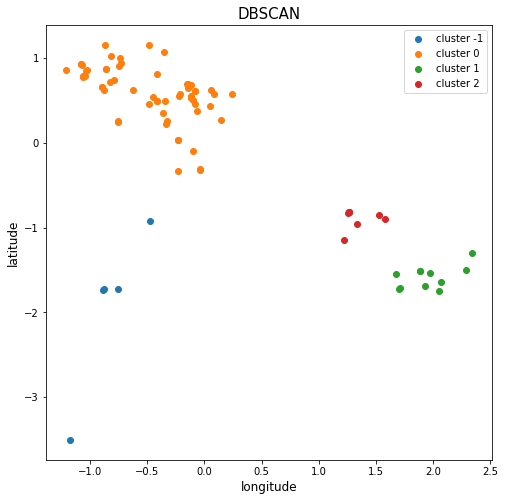

In [ ]:
# DBSCAN으로 시각화
plt.figure(figsize=(8,8))

for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, '경도'], df_scale.loc[df_scale['cluster'] == i, '위도'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('DBSCAN', size = 15)
plt.xlabel('longitude', size = 12)
plt.ylabel('latitude', size = 12)
plt.show()

# KMeans

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/쿠팡물류센터/쿠팡물류센터.csv')
df.head

<bound method NDFrame.head of         물류센터이름         위도          경도
0     쿠팡 용인2캠프  37.224143  127.098984
1   쿠팡물류센터 동탄점  37.171236  127.125612
2     쿠팡 동탄1센터  37.171107  127.125676
3       쿠팡오산센터  37.140799  127.067172
4   쿠팡 용인2,3센터  37.176290  127.179059
..         ...        ...         ...
78    쿠팡 제주1캠프  33.463293  126.527863
79    쿠팡 대구2캠프  35.929339  128.655630
80    쿠팡 울산2캠프  35.509751  129.301472
81  쿠팡 대전2미니캠프  36.423367  127.421486
82    쿠팡 부산4캠프  35.090881  129.070325

[83 rows x 3 columns]>

In [ ]:
# 쿠팡 물류센터의 위도, 경도만 추출
df_coord = df.drop(labels = '물류센터이름', axis=1)
df_coord

,위도,경도
0,37.224143,127.098984
1,37.171236,127.125612
2,37.171107,127.125676
3,37.140799,127.067172
4,37.176290,127.179059
...,...,...
78,33.463293,126.527863
79,35.929339,128.655630
80,35.509751,129.301472
81,36.423367,127.421486


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)


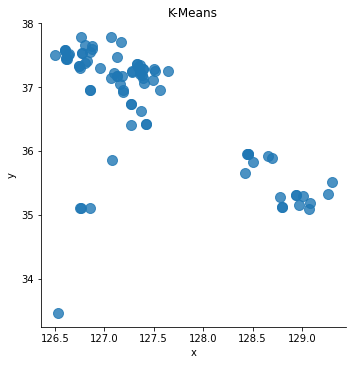

In [ ]:
# 좌표평면 상에 물류센터 나타내기
sns.lmplot('경도', '위도', data=df_coord, fit_reg=False, scatter_kws={"s" : 100})

# title
plt.title('K-Means')

# label
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
# 데이터프레임을 넘파이로 전환 후에 알고리즘 실행
data_points = df_coord.values
kmeans = KM(n_clusters = 4).fit(data_points)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1,
       2, 0, 2, 2, 2, 1, 0, 1, 0, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 0,
       2, 1, 2, 2, 0, 0, 1, 2, 3, 1, 3, 0, 3, 1, 1, 0, 1], dtype=int32)

In [ ]:
# 군집 중심점 추출
kmeans.cluster_centers_

array([[ 37.06621759, 127.29985952],
       [ 35.51791804, 128.79137574],
       [ 37.51757563, 126.77571289],
       [ 34.93266533, 126.79625492]])

In [ ]:
# 군집별 ID 부여
df_coord['cluster_id'] = kmeans.labels_
df_coord

,위도,경도,cluster_id
0,37.224143,127.098984,0
1,37.171236,127.125612,0
2,37.171107,127.125676,0
3,37.140799,127.067172,0
4,37.176290,127.179059,0
...,...,...,...
78,33.463293,126.527863,3
79,35.929339,128.655630,1
80,35.509751,129.301472,1
81,36.423367,127.421486,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flag

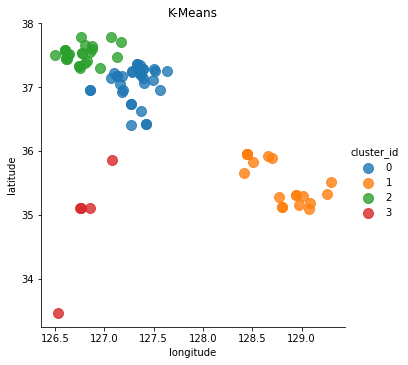

In [ ]:
# 좌표평면상 군집 시각화
sns.lmplot('경도', '위도', data=df_coord, fit_reg=False, scatter_kws={'s':100}, hue='cluster_id')

plt.title('K-Means')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

## 픽업센터 입지 후보지
* 전주시 구역별 주거인구 데이터의 위, 경도 추출
* 군집 분석 후, 군집별 중심 확인
* 버스노선도와 등고선 데이터를 토대로 세부 조정

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as KM

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/basic_인구 성비 연령대 데이터/구역별 주거인구.csv', encoding='euc-kr')
df.head

<bound method NDFrame.head of      MEGA_NM  MEGA_CD   CTY_NM  CTY_CD  X_AXIS  Y_AXIS    HOUS     POP  \
0       전라북도       45  전주시 덕진구   45113  322950  359850   37.76  110.27   
1       전라북도       45  전주시 덕진구   45113  325450  358850   22.75   59.15   
2       전라북도       45  전주시 덕진구   45113  322950  360850   46.48  127.92   
3       전라북도       45  전주시 덕진구   45113  323550  360450   46.66  135.30   
4       전라북도       45  전주시 덕진구   45113  324350  362550    1.22    3.49   
...      ...      ...      ...     ...     ...     ...     ...     ...   
5535    전라북도       45  전주시 완산구   45111  319650  359650  262.00  754.83   
5536    전라북도       45  전주시 완산구   45111  317450  356250    1.23    3.76   
5537    전라북도       45  전주시 완산구   45111  322950  356850   72.43  202.06   
5538    전라북도       45  전주시 완산구   45111  317650  354550    1.35    4.25   
5539    전라북도       45  전주시 완산구   45111  318550  356550   60.00  147.62   

      POP_10  POP_20  ...  average       sd  POP_20+30  정규화최종    정규화최_1  \
0     

In [ ]:
df_coord = df[['X_AXIS', 'Y_AXIS']]
df_coord

,X_AXIS,Y_AXIS
0,322950,359850
1,325450,358850
2,322950,360850
3,323550,360450
4,324350,362550
...,...,...
5535,319650,359650
5536,317450,356250
5537,322950,356850
5538,317650,354550


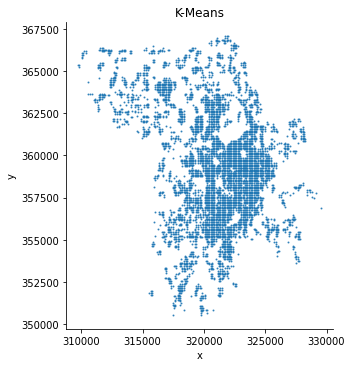

In [ ]:
# 좌표평면 상에 물류센터 나타내기
sns.lmplot('X_AXIS', 'Y_AXIS', data=df_coord, fit_reg=False, scatter_kws={"s" : 1})

# title
plt.title('K-Means')

# label
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
# 데이터프레임을 넘파이로 전환 후에 알고리즘 실행
data_points = df_coord.values
kmeans = KM(n_clusters = 36).fit(data_points)
kmeans.labels_

array([35, 24, 35, ...,  5,  6, 17], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[320651.46341463, 359204.14634146],
       [319140.07092199, 365045.74468085],
       [321879.25531915, 355082.9787234 ],
       [327086.60714286, 361095.53571429],
       [315583.33333333, 365142.38095238],
       [323384.34343434, 356423.73737374],
       [317435.24590164, 355578.41530055],
       [323986.2745098 , 361106.37254902],
       [318736.51685393, 353702.80898876],
       [323680.80357143, 359371.42857143],
       [316844.44444444, 363778.39506173],
       [322773.07692308, 364644.87179487],
       [327339.47368421, 356324.56140351],
       [320555.85106383, 357417.55319149],
       [311915.625     , 363742.1875    ],
       [320661.53846154, 361060.43956044],
       [316044.4       , 361675.6       ],
       [318844.02173913, 357321.19565217],
       [320899.59349593, 363000.40650407],
       [321632.        , 366133.        ],
       [319831.13207547, 351504.71698113],
       [312110.71428571, 365773.80952381],
       [322440.17857143, 358384.82142857],
       [319

In [ ]:
df_coord['cluster_id'] = kmeans.labels_
df_coord

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,X_AXIS,Y_AXIS,cluster_id
0,322950,359850,35
1,325450,358850,24
2,322950,360850,35
3,323550,360450,7
4,324350,362550,32
...,...,...,...
5535,319650,359650,23
5536,317450,356250,6
5537,322950,356850,5
5538,317650,354550,6


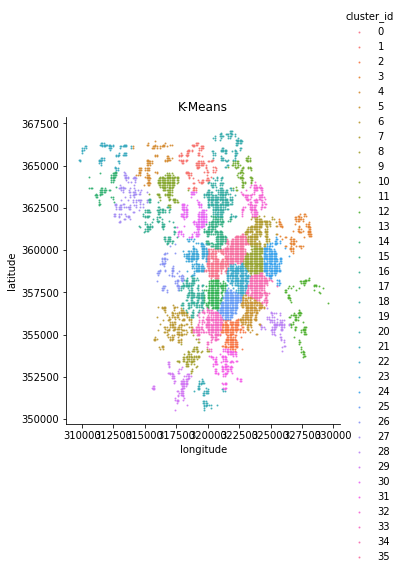

In [ ]:
sns.lmplot('X_AXIS', 'Y_AXIS', data=df_coord, fit_reg=False, scatter_kws={'s':1}, hue='cluster_id')

plt.title('K-Means')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

# 유통 알고리즘 가중치

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
distance = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/유통 알고리즘/거리 행렬.csv')
card_data = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/유통 알고리즘/픽업센터, 카드 정규화.csv')

,field_1,X_AXIS,Y_AXIS,cls_num,card_scaled_field_2
0,0,320651.463415,359204.146341,27,0.255373
1,1,319140.070922,365045.744681,31,0.052211
2,2,321879.255319,355082.978723,32,0.012216
3,3,327086.607143,361095.535714,35,0.061318
4,4,315583.333333,365142.380952,8,0.044060
5,5,323384.343434,356423.737374,6,0.020357
6,6,317435.245902,355578.415301,14,0.108091
7,7,323986.274510,361106.372549,28,0.128122
8,8,318736.516854,353702.808989,7,0.115556
9,9,323680.803571,359371.428571,1,0.094624


In [ ]:
distance

,InputID,TargetID,Distance
0,27,31,6279.381184
1,27,32,4599.798490
2,27,35,6560.890254
3,27,8,7424.420236
4,27,6,3899.061466
...,...,...,...
1255,25,24,3990.450985
1256,25,10,6963.087922
1257,25,15,3336.807017
1258,25,2,5052.408300


In [ ]:
result = []

for i in range(36):
  temp = distance[distance['InputID'] == i]
  scale_value = card_data[card_data['cls_num'] == i]
  x = float(scale_value['card_scaled_field_2'])
  for j in range(36):
    if i == j:
      result.append(0)
    else:
      scale_value_2 = card_data[card_data['cls_num'] == j]
      y = float(scale_value_2['card_scaled_field_2'])
      sub = abs(x-y)
      data = temp[temp['TargetID'] == j]
      result.append(float(data['Distance'].to_numpy() * sub))

print(len(result))

1296


In [ ]:
index = [i for i in range(36)]
df = pd.DataFrame(np.array(result).reshape(36, 36))

df.to_csv('가중치 곱.csv')

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/import pandas as pd
import numpy as np

distance = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/유통 알고리즘/거리 행렬.csv')
card_data = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/유통 알고리즘/픽업센터, 카드 정규화.csv')

distance

result = []

for i in range(36):
  temp = distance[distance['InputID'] == i]
  scale_value = card_data[card_data['cls_num'] == i]
  x = float(scale_value['card_scaled_field_2'])
  for j in range(36):
    if i == j:
      result.append(0)
    else:
      scale_value_2 = card_data[card_data['cls_num'] == j]
      y = float(scale_value_2['card_scaled_field_2'])
      sub = abs(x-y)
      data = temp[temp['TargetID'] == j]
      result.append(float(data['Distance'].to_numpy() * sub))

print(len(result))

index = [i for i in range(36)]
df = pd.DataFrame(np.array(result).reshape(36, 36))

df.to_csv('가중치 곱.csv')데이터/쿠팡물류센터/쿠팡물류센터.csv')
df_coord = df.drop(labels='물류센터이름', axis=1)
df_coord

,위도,경도
0,37.224143,127.098984
1,37.171236,127.125612
2,37.171107,127.125676
3,37.140799,127.067172
4,37.176290,127.179059
...,...,...
78,33.463293,126.527863
79,35.929339,128.655630
80,35.509751,129.301472
81,36.423367,127.421486


# 물류유통알고리즘

In [ ]:
def networkFlow(source, sink, capacity, flow):
  N, totalFlow = len(capacity), 0
  while(True):
    parent = [-1] * N
    queue = Queue()
    parent[source] = source
    queue.put(source)
    while (not queue.empty() and parent[sink] == -1):
      here = queue.get()
      for there in range(0, N):
        if (capacity[here][there] - flow[here][there] > 0 and parent[there] == -1):
          queue.put(there)
          parent[there] = here
          if (parent[sink] == -1) : break
          p, amount = sink, INF
          while (p != source) :
            amount = min(amount, capacity[parent[p]][p] - flow[parent[p]][p])
            p = parent[p]
          p = sink
          while (p != source) :
            flow[parent[p]][p] += amount
            flow[p][parent[p]] -= amount
            p = parent[p]
          totalFlow += amount
    return totalFlow

In [ ]:
from collections import defaultdict

class Graph:

    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)

    def searching_algo_BFS(self, s, t, parent):

        visited = [False] * (self.ROW)
        queue = []

        queue.append(s)
        visited[s] = True

        while queue:

            u = queue.pop(0)

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.searching_algo_BFS(source, sink, parent):

            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]


            max_flow += path_flow


            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow




In [ ]:
# 거리행렬
import pandas as pd

df1 = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/유통 알고리즘/p_median1_가중치 곱.csv')
df_1 = df1.drop(labels='Unnamed: 0', axis=1)
df_1

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.000000,461.544807,581.747004,4690.870418,186.185465,677.605668,18.426379,513.650143,122.826878,375.457751,...,847.543372,766.340304,248.224913,137.394871,201.771135,69.227505,503.275774,1338.941788,388.838739,7469.488598
1,461.544807,0.000000,255.861673,7270.879352,517.678949,258.329150,207.463606,151.886733,482.575781,41.214618,...,450.462274,65.775747,117.856368,705.243045,308.830726,391.924097,20.911688,1349.196423,130.657769,2128.522785
2,581.747004,255.861673,0.000000,7588.590821,1388.354218,143.779143,416.077827,74.087959,1049.486831,479.397457,...,399.554393,126.159362,275.649883,520.999521,934.287857,239.931455,130.340990,698.710671,740.287208,3810.190009
3,4690.870418,7270.879352,7588.590821,0.000000,5991.569886,3887.689357,9641.388397,9066.991089,1446.510502,8696.485245,...,4431.415009,6648.294117,2002.980205,12382.966580,3026.709269,10175.302910,7205.821735,3475.449653,9877.647926,0.000010
4,186.185465,517.678949,1388.354218,5991.569886,0.000000,643.034738,167.817137,1347.701921,315.621583,400.131620,...,1491.302221,479.260876,806.954162,73.714384,170.269779,121.404390,717.403741,2082.179115,343.593471,7750.098428
5,677.605668,258.329150,143.779143,3887.689357,643.034738,0.000000,840.275313,445.524816,789.002872,474.751638,...,185.575091,134.411642,298.771239,1580.281952,499.932139,1067.422155,224.114945,301.836525,671.715786,4626.623188
6,18.426379,207.463606,416.077827,9641.388397,167.817137,840.275313,0.000000,512.708698,268.337468,167.155574,...,916.232253,508.771488,806.529445,79.332476,310.134387,18.683419,169.618060,2527.804102,236.420919,1190.963371
7,513.650143,151.886733,74.087959,9066.991089,1347.701921,445.524816,512.708698,0.000000,814.178166,392.140919,...,814.440863,114.047218,49.105769,278.110102,742.589623,335.708516,28.684434,1139.363521,594.882279,5838.113108
8,122.826878,482.575781,1049.486831,1446.510502,315.621583,789.002872,268.337468,814.178166,0.000000,275.789228,...,1568.691694,764.673026,197.561746,525.129271,33.075598,371.975057,640.346457,483.091022,206.394117,11107.351710
9,375.457751,41.214618,479.397457,8696.485245,400.131620,474.751638,167.155574,392.140919,275.789228,0.000000,...,824.860257,120.483404,375.451951,561.798402,140.707968,324.169168,110.595656,1846.877255,20.066518,2229.867188


In [ ]:
graph = df_1.to_numpy()
graph

array([[    0.       ,   461.5448072,   581.7470035, ...,  1338.941788 ,
          388.8387388,  7469.488598 ],
       [  461.5448072,     0.       ,   255.8616726, ...,  1349.196423 ,
          130.6577691,  2128.522785 ],
       [  581.7470035,   255.8616726,     0.       , ...,   698.7106714,
          740.2872082,  3810.190009 ],
       ...,
       [ 1338.941788 ,  1349.196423 ,   698.7106714, ...,     0.       ,
         2138.954414 , 11251.40764  ],
       [  388.8387388,   130.6577691,   740.2872082, ...,  2138.954414 ,
            0.       ,  4357.705618 ],
       [ 7469.488598 ,  2128.522785 ,  3810.190009 , ..., 11251.40764  ,
         4357.705618 ,     0.       ]])

In [ ]:
# 1번 후보
result = 0;
for i in range(36):
  g = Graph(graph)
  source = 36
  sink = i
  result += g.ford_fulkerson(source, sink)

print(result)

161220.13433362893


In [ ]:
df2 = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/유통 알고리즘/p_median2_가중치 곱.csv')
df_2 = df2.drop(labels='Unnamed: 0', axis=1)
df_2

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.000000,461.544807,581.747004,4690.870418,186.185465,677.605668,18.426379,513.650143,122.826878,375.457751,...,847.543372,766.340304,248.224913,137.394871,201.771135,69.227505,503.275774,1338.941788,388.838739,5626.440645
1,461.544807,0.000000,255.861673,7270.879352,517.678949,258.329150,207.463606,151.886733,482.575781,41.214618,...,450.462274,65.775747,117.856368,705.243045,308.830726,391.924097,20.911688,1349.196423,130.657769,1026.035816
2,581.747004,255.861673,0.000000,7588.590821,1388.354218,143.779143,416.077827,74.087959,1049.486831,479.397457,...,399.554393,126.159362,275.649883,520.999521,934.287857,239.931455,130.340990,698.710671,740.287208,3209.262422
3,4690.870418,7270.879352,7588.590821,0.000000,5991.569886,3887.689357,9641.388397,9066.991089,1446.510502,8696.485245,...,4431.415009,6648.294117,2002.980205,12382.966580,3026.709269,10175.302910,7205.821735,3475.449653,9877.647926,0.000010
4,186.185465,517.678949,1388.354218,5991.569886,0.000000,643.034738,167.817137,1347.701921,315.621583,400.131620,...,1491.302221,479.260876,806.954162,73.714384,170.269779,121.404390,717.403741,2082.179115,343.593471,6303.952389
5,677.605668,258.329150,143.779143,3887.689357,643.034738,0.000000,840.275313,445.524816,789.002872,474.751638,...,185.575091,134.411642,298.771239,1580.281952,499.932139,1067.422155,224.114945,301.836525,671.715786,2960.219761
6,18.426379,207.463606,416.077827,9641.388397,167.817137,840.275313,0.000000,512.708698,268.337468,167.155574,...,916.232253,508.771488,806.529445,79.332476,310.134387,18.683419,169.618060,2527.804102,236.420919,1983.311223
7,513.650143,151.886733,74.087959,9066.991089,1347.701921,445.524816,512.708698,0.000000,814.178166,392.140919,...,814.440863,114.047218,49.105769,278.110102,742.589623,335.708516,28.684434,1139.363521,594.882279,5415.522784
8,122.826878,482.575781,1049.486831,1446.510502,315.621583,789.002872,268.337468,814.178166,0.000000,275.789228,...,1568.691694,764.673026,197.561746,525.129271,33.075598,371.975057,640.346457,483.091022,206.394117,9098.872396
9,375.457751,41.214618,479.397457,8696.485245,400.131620,474.751638,167.155574,392.140919,275.789228,0.000000,...,824.860257,120.483404,375.451951,561.798402,140.707968,324.169168,110.595656,1846.877255,20.066518,2388.812780


In [ ]:
# 2번 후보
graph = df_2.to_numpy()
result = 0;
for i in range(36):
  g = Graph(graph)
  source = 36
  sink = i
  result += g.ford_fulkerson(source, sink)

print(result)

159654.61961499997


In [ ]:
df3 = pd.read_csv('/content/drive/Shareddrives/TAVE 프로젝트/데이터/유통 알고리즘/p_median3_가중치 곱.csv')
df_3 = df3.drop(labels='Unnamed: 0', axis=1)
df_3

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.000000,461.544807,581.747004,4690.870418,186.185465,677.605668,18.426379,513.650143,122.826878,375.457751,...,847.543372,766.340304,248.224913,137.394871,201.771135,69.227505,503.275774,1338.941788,388.838739,7089.510452
1,461.544807,0.000000,255.861673,7270.879352,517.678949,258.329150,207.463606,151.886733,482.575781,41.214618,...,450.462274,65.775747,117.856368,705.243045,308.830726,391.924097,20.911688,1349.196423,130.657769,950.147295
2,581.747004,255.861673,0.000000,7588.590821,1388.354218,143.779143,416.077827,74.087959,1049.486831,479.397457,...,399.554393,126.159362,275.649883,520.999521,934.287857,239.931455,130.340990,698.710671,740.287208,5068.751470
3,4690.870418,7270.879352,7588.590821,0.000000,5991.569886,3887.689357,9641.388397,9066.991089,1446.510502,8696.485245,...,4431.415009,6648.294117,2002.980205,12382.966580,3026.709269,10175.302910,7205.821735,3475.449653,9877.647926,0.000010
4,186.185465,517.678949,1388.354218,5991.569886,0.000000,643.034738,167.817137,1347.701921,315.621583,400.131620,...,1491.302221,479.260876,806.954162,73.714384,170.269779,121.404390,717.403741,2082.179115,343.593471,4904.859118
5,677.605668,258.329150,143.779143,3887.689357,643.034738,0.000000,840.275313,445.524816,789.002872,474.751638,...,185.575091,134.411642,298.771239,1580.281952,499.932139,1067.422155,224.114945,301.836525,671.715786,2996.396786
6,18.426379,207.463606,416.077827,9641.388397,167.817137,840.275313,0.000000,512.708698,268.337468,167.155574,...,916.232253,508.771488,806.529445,79.332476,310.134387,18.683419,169.618060,2527.804102,236.420919,3548.508312
7,513.650143,151.886733,74.087959,9066.991089,1347.701921,445.524816,512.708698,0.000000,814.178166,392.140919,...,814.440863,114.047218,49.105769,278.110102,742.589623,335.708516,28.684434,1139.363521,594.882279,7342.821187
8,122.826878,482.575781,1049.486831,1446.510502,315.621583,789.002872,268.337468,814.178166,0.000000,275.789228,...,1568.691694,764.673026,197.561746,525.129271,33.075598,371.975057,640.346457,483.091022,206.394117,9362.131735
9,375.457751,41.214618,479.397457,8696.485245,400.131620,474.751638,167.155574,392.140919,275.789228,0.000000,...,824.860257,120.483404,375.451951,561.798402,140.707968,324.169168,110.595656,1846.877255,20.066518,984.858658


In [ ]:
# 3번 후보
graph = df_3.to_numpy()
result = 0;
for i in range(36):
  g = Graph(graph)
  source = 36
  sink = i
  result += g.ford_fulkerson(source, sink)

print(result)

180243.48945009997
